___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import seaborn as sns
import os

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [3]:
start= datetime(2006, 1, 1)
end = datetime(2016, 1, 1)

In [8]:
BAC= data.DataReader("BAC",'yahoo', start ,end)
C=   data.DataReader("C",'yahoo',start, end)
GS=  data.DataReader("GS",'yahoo', start, end)
JPM= data.DataReader("JPM",'yahoo', start, end)
MS=  data.DataReader("MS",'yahoo', start, end)
WFC= data.DataReader("WFC",'yahoo', start, end)

In [438]:
# Tiingo

#BAC= data.get_data_tiingo("WFC", start ,end ,api_key='16bddf47266fe007ec5ea5e56293a3e75b9ec8b8')
#C=   data.get_data_tiingo("C",start ,end ,api_key='16bddf47266fe007ec5ea5e56293a3e75b9ec8b8')
#GS=  data.get_data_tiingo("GS",start ,end ,api_key='16bddf47266fe007ec5ea5e56293a3e75b9ec8b8')
#JPM= data.get_data_tiingo("JPM",start ,end ,api_key='16bddf47266fe007ec5ea5e56293a3e75b9ec8b8')
#MS=  data.get_data_tiingo("MS",start ,end ,api_key='16bddf47266fe007ec5ea5e56293a3e75b9ec8b8')
#WFC= data.get_data_tiingo("WFC",start ,end ,api_key='16bddf47266fe007ec5ea5e56293a3e75b9ec8b8')




In [439]:
#BAC.drop(['adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis=1,inplace=True)
#C.drop(['adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis=1,inplace=True)
#GS.drop(['adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis=1,inplace=True)
#WFC.drop(['adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis=1,inplace=True)
#MS.drop(['adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis=1,inplace=True)
#JPM.drop(['adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis=1,inplace=True)




** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [9]:
tickers=sorted(['BAC','C','WFC','JPM','GS','MS'])
tickers


['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [10]:
bank_stocks=pd.concat(objs=(BAC,C,GS,JPM,GS,MS),axis=1,keys=tickers)
bank_stocks

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.054218   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.681938   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.726604   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.674480   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.696808   
...               ...        ...        ...        ...         ...        ...   
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.859037   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.730473   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  15.868218   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.657003   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  15.454980   

                     C                                      ...          MS  \
                  High         Low        Open       Close  ...        Open   
Date                                                        ...               
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  126.699997   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  127.349998   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  126.000000   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  127.290001   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  128.500000   
...                ...         ...         ...         ...  ...         ...   
2015-12-24   52.970001   52.450001   52.480000   52.709999  ...  182.270004   
2015-12-28   52.570000   51.959999   52.570000   52.380001  ...  181.770004   
2015-12-29   53.220001   52.740002   52.759998   52.980000  ...  182.820007   
2015-12-30   52.939999   52.250000   52.840000   52.299999  ...  183.279999   
2015-12-31   52.389999   51.750000   52.070000   51.750000  ...  181.160004   

                                                     WFC             \
                 Close     Volume   Adj Close       High        Low   
Date                                                                  
2006-01-03  128.869995  6188700.0  106.906731  58.490002  56.740002   
2006-01-04  127.089996  4861600.0  105.430092  59.279999  58.349998   
2006-01-05  127.040001  3717400.0  105.388611  58.590000  58.020000   
2006-01-06  128.839996  4319600.0  106.881790  58.849998  58.049999   
2006-01-09  130.389999  4723500.0  108.167694  59.290001  58.619999   
...                ...        ...         ...        ...        ...   
2015-12-24  182.470001  1107600.0  169.394363  32.709999  32.439999   
2015-12-28  181.619995  1723300.0  168.605270  32.360001  31.950001   
2015-12-29  183.529999  1848900.0  170.378403  32.700001  32.330002   
2015-12-30  182.009995  1514300.0  168.967316  32.650002  32.200001   
2015-12-31  180.229996  1773900.0  167.314880  32.299999  31.770000   

                                                        
                 Open      Close     Volume  Adj Close  
Date                                                    
2006-01-03  57.169998  58.310001  5377000.0  37.399338  
2006-01-04  58.700001  58.349998  7977800.0  37.424999  
2006-01-05  58.549999  58.509998  5778000.0  37.527611  
2006-01-06  58.770000  58.570000  6889800.0  37.566090  
2006-01-09  58.630001  59.189999  4144500.0  37.963749  
...               ...        ...        ...        ...  
2015-12-24  32.570000  32.480000  2798200.0  29.116337  
2015-12-28  32.360001  32.169998  5420300.0  28.838438  
2015-12-29  32.439999  32.549999  6388200.0  29.179089  
2015-12-30  32.500000  32.230000  5057200.0  28.892221  
2015-12-31  31.910000  31.809999  815430


** Set the column name levels (this is filled out for you):**

In [11]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [12]:
bank_stocks.head(10)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   
2006-01-10   46.509998  45.880001  46.400002  46.209999  15634600.0   
2006-01-11   46.250000  45.750000  46.060001  46.099998  14742100.0   
2006-01-12   46.230000  45.709999  46.220001  45.799999  10546600.0   
2006-01-13   46.000000  45.680000  45.830002  45.799999  10791000.0   
2006-01-17   45.580002  45.000000  45.400002  45.310001  14605900.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.726604  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.674480  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.696808  487.399994  483.000000  486.000000  483.899994  ...   
2006-01-10   34.406448  485.500000  480.799988  483.000000  485.399994  ...   
2006-01-11   34.324547  495.799988  485.799988  495.799988  489.799988  ...   
2006-01-12   34.101177  491.000000  488.799988  491.000000  490.299988  ...   
2006-01-13   34.101177  491.899994  487.299988  491.000000  489.200012  ...   
2006-01-17   33.736332  487.000000  482.700012  485.100006  484.299988  ...   

Bank Ticker          MS                                           WFC  \
Stock Info         Open       Close     Volume   Adj Close       High   
Date                                                                    
2006-01-03   126.699997  128.869995  6188700.0  106.906731  58.490002   
2006-01-04   127.349998  127.089996  4861600.0  105.430092  59.279999   
2006-01-05   126.000000  127.040001  3717400.0  105.388611  58.590000   
2006-01-06   127.290001  128.839996  4319600.0  106.881790  58.849998   
2006-01-09   128.500000  130.389999  4723500.0  108.167694  59.290001   
2006-01-10   130.050003  132.029999  5536800.0  109.528145  59.220001   
2006-01-11   131.449997  131.970001  4671400.0  109.478401  59.880001   
2006-01-12   131.399994  132.250000  3725500.0  109.710686  59.779999   
2006-01-13   132.020004  133.259995  2894900.0  110.548531  59.669998   
2006-01-17   131.000000  132.589996  3621600.0  109.992699  59.459999   

Bank Ticker                                                         
Stock Info         Low       Open      Close     Volume  Adj Close  
Date                                                                
2006-01-03   56.740002  57.169998  58.310001  5377000.0  37.399338  
2006-01-04   58.349998  58.700001  58.349998  7977800.0  37.424999  
2006-01-05   58.020000  58.549999  58.509998  5778000.0  37.527611  
2006-01-06   58.049999  58.770000  58.570000  6889800.0  37.566090  
2006-01-09   58.619999  58.630001  59.189999  4144500.0  37.963749  
2006-01-10   58.580002  58.849998  59.220001  4713600.0  37.982994  
2006-01-11   58.840000  59.150002  59.570000  5837900.0  38.382484  
2006-01-12   59.270000  59.630001  59.470001  3817700.0  38.318054  
2006-01-13   59.060001  59.570000  59.380001  3430900.0  38.260071  
2006-01-17   58.680000  59.450001  58.810001  2624700.0  37.892788  

[10 rows x 36 columns]

In [450]:
#bank_stocks=pd.read_pickle('all_banks')

In [13]:
#bank_stocks

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [14]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS     247.919998
WFC     89.300003
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [15]:
returns = pd.DataFrame()
returns

""


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [16]:
for bank in tickers:
    returns[bank+ ' Return']=bank_stocks[bank]['Close'].pct_change()
returns.index.names=['Date']
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,-0.013812,0.000686
2006-01-05,0.001288,0.004961,-0.000393,0.003029,-0.000393,0.002742
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.014169,0.001025
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.012030,0.010586


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

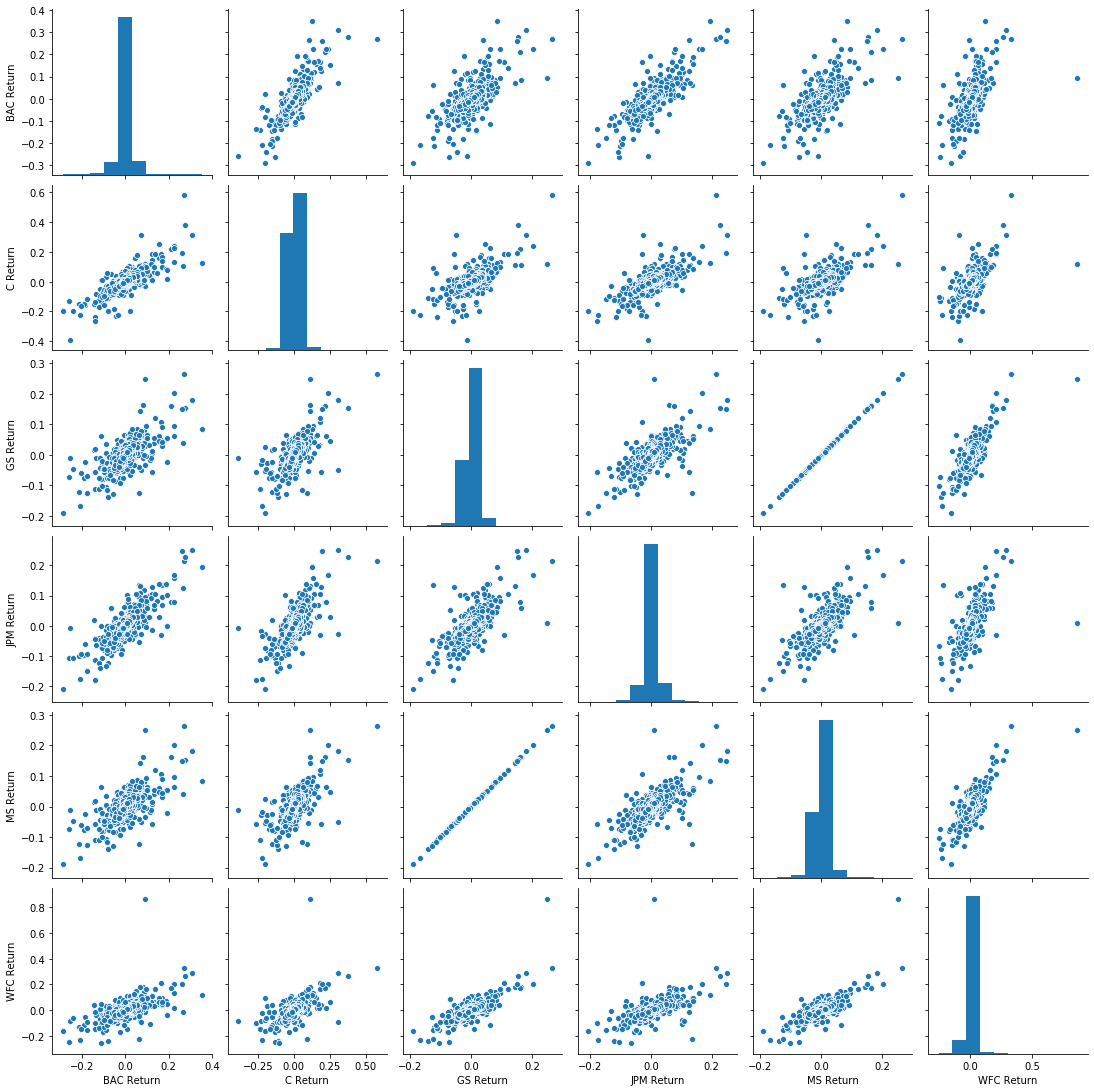

In [17]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [18]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2009-01-20
WFC Return   2008-10-09
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [19]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-11-24
WFC Return   2008-10-13
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [20]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.025390
WFC Return    0.037819
dtype: float64

In [37]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.014046
WFC Return    0.016249
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

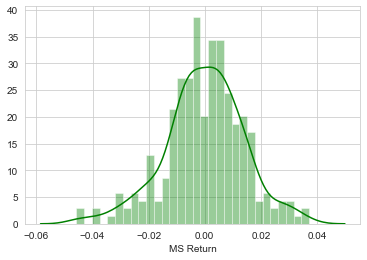

In [38]:
sns.set_style('whitegrid')
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],bins=30,color='Green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

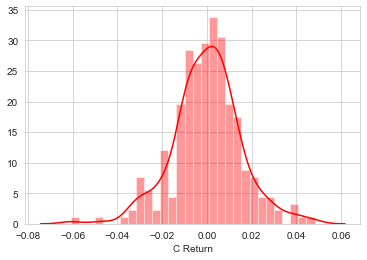

In [39]:
sns.distplot(returns.loc['2015-01-01' : '2015-12-31']['C Return'],bins=30,color='Red')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

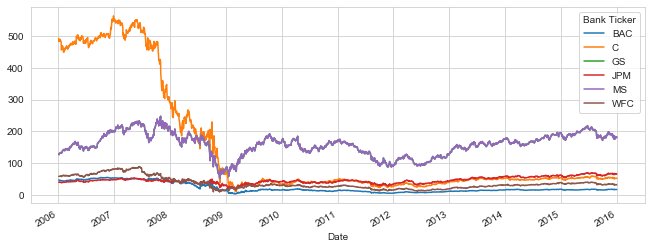

In [25]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(11,4))

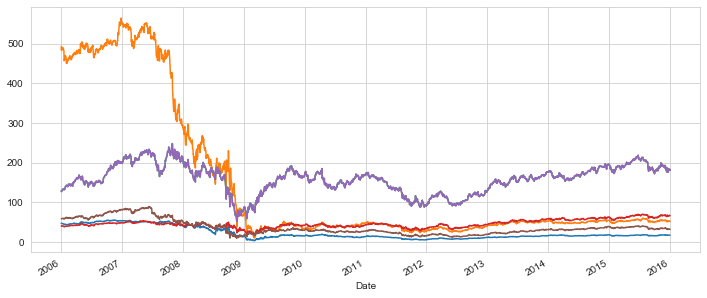

In [26]:
# using a for loop
for bank in tickers:
    bank_stocks[bank]['Close'].plot(figsize=(12,5))
plt.show()

In [27]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

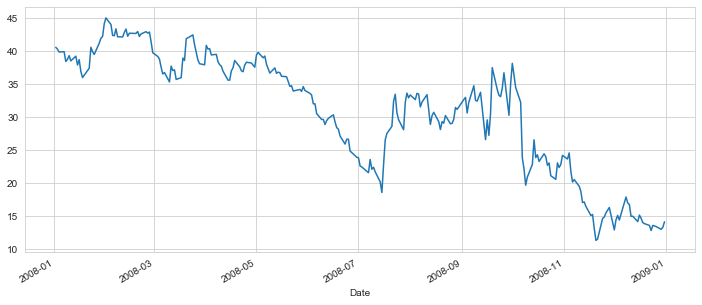

In [40]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info')['BAC'].loc['2008-01-01' : '2008-12-31'].plot(figsize=(12,5))

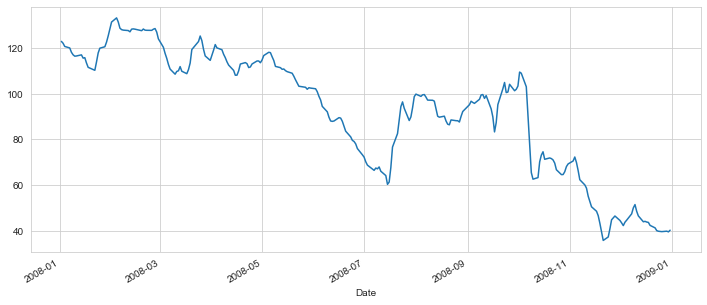

In [41]:
bank_stocks['BAC']['Close'].rolling(window=3).sum().loc['2008-01-01':'2008-12-31'].plot(figsize=(12,5))

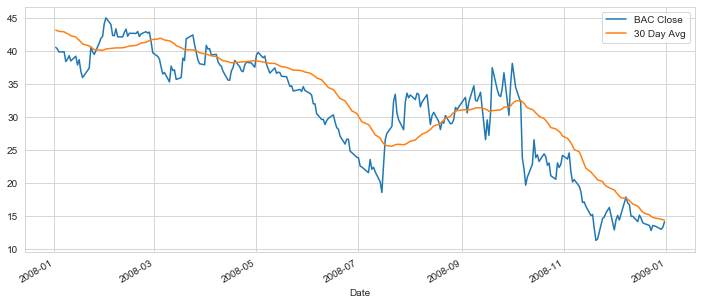

In [42]:
plt.figure(figsize=(12,5))
bank_stocks.xs(key='Close',axis=1,level='Stock Info')['BAC'].loc['2008-01-01' : '2008-12-31'].plot(label='BAC Close')
bank_stocks['BAC']['Close'].rolling(window=30).mean().loc['2008-01-01':'2008-12-31'].plot(label='30 Day Avg')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

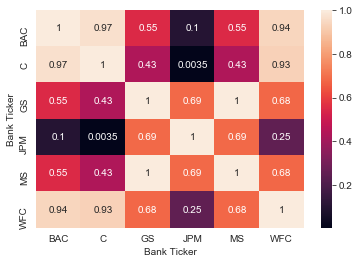

In [43]:
#bank_stocks=bank_stocks.corr()
data=bank_stocks.xs(key='Close',axis=1,level='Stock Info')
data=data.corr()
sns.heatmap(data,annot=True)


** Optional: Use seaborn's clustermap to cluster the correlations together:**

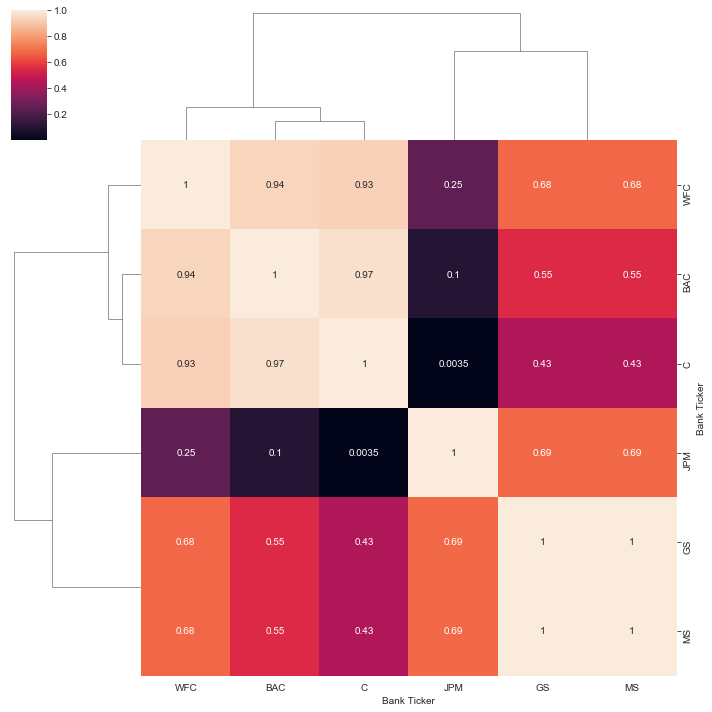

In [44]:
sns.clustermap(data,annot=True)

In [45]:
data.iplot()

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [46]:
bank_stocks.xs(key='BAC',level='Bank Ticker',axis=1).loc['2015-01-01' : '2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [47]:
data=bank_stocks.xs(key='MS',level='Bank Ticker',axis=1)
data['Close'].loc['2015-01-01' : '2015-12-31'].ta_plot(study='sma')
#data.loc['2015-1-1' : '2015-12-31'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [48]:
data=bank_stocks.xs(key='BAC',level='Bank Ticker',axis=1)
data['Close'].loc['2015-01-01' : '2015-12-31'].ta_plot(study='boll')


# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.